In [1]:
# this is using the positive/negative frequency data to find a correlation with the price change

In [1]:
import pandas as pd

In [83]:
# data date: 2018-1-09 ~ 2018-2-28
freq_data = pd.read_json("Amazon_8000_newsSentiment.json")

In [84]:
# group up dates 
freq_data = freq_data.groupby(['Date']).sum()
freq_data['Date'] = freq_data.index
freq_data.index = range(len(freq_data))
freq_data = freq_data[['Date', 'freqeuency'] ]

In [81]:
price_data = pd.read_csv("AMZN1yr.csv")

In [85]:
def dateMatch(s):
    dateTime = s.to_datetime()
    return str(dateTime.month) + '/' + str(dateTime.day) + '/' + str(dateTime.year)[-2:]
    
freq_data['Date'] = freq_data['Date'].apply(dateMatch)

/Users/YangLiu/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2355: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [86]:
#price_data.loc[price_data['Date']=='12/9/17'] # index 201
dataNeeded = price_data.merge(freq_data,on='Date')
dataNeeded['PriceChange'] = dataNeeded['Close'].diff()

In [87]:
#df = freq_data['FreqNum'].loc[::-1]
#df.index = range(len(dataNeeded))
#string(dataNeeded['Date'].iloc[0])
#price_data.merge(freq_data,on='Date')

,Date,Open,High,Low,Close,Adj Close,Volume,freqeuency,PriceChange
0,8/9/17,982.599976,988.000000,975.270020,982.010010,982.010010,3569700,0.440034,NaN
1,8/10/17,976.299988,979.859985,954.679993,956.919983,956.919983,5684100,0.829656,-25.090027
2,8/11/17,960.000000,970.390015,951.380005,967.989990,967.989990,3468000,1.487180,11.070007
3,8/14/17,978.409973,985.500000,976.190002,983.299988,983.299988,3042800,0.619439,15.309998
4,8/15/17,988.900024,991.739990,982.000000,982.739990,982.739990,2549300,1.422523,-0.559998
5,8/16/17,981.650024,986.460022,973.219971,978.179993,978.179993,3132100,2.566220,-4.559997
6,8/17/17,977.840027,977.840027,960.320007,960.570007,960.570007,3512400,2.943349,-17.609986
7,8/18/17,961.400024,965.429993,954.650024,958.469971,958.469971,3284800,0.723727,-2.100036
8,8/21/17,957.570007,961.200012,945.460022,953.289978,953.289978,3164500,2.355346,-5.179993
9,8/22/17,955.520020,967.929993,955.500000,966.900024,966.900024,2750000,3.952391,13.610046


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

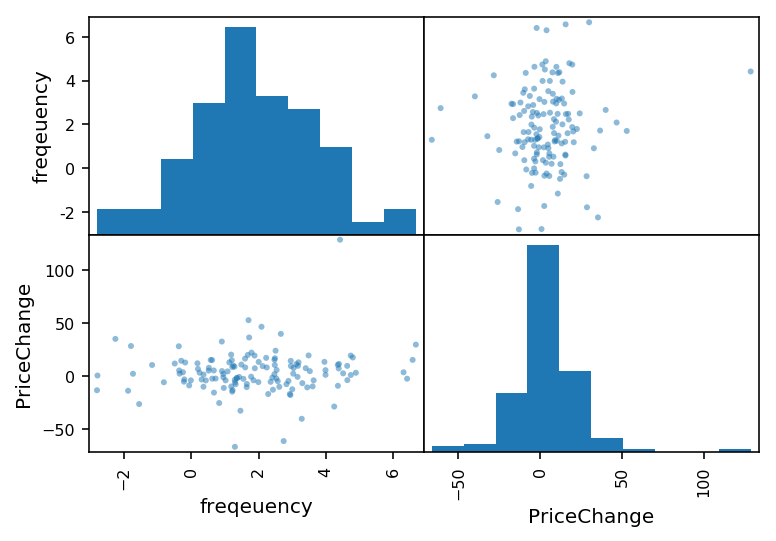

In [89]:
# scatter plot it
fig = pd.plotting.scatter_matrix(dataNeeded.loc[1:][['freqeuency','PriceChange']])
plt.show()

,freqeuency,PriceChange
freqeuency,1.000000,0.091006
PriceChange,0.091006,1.000000


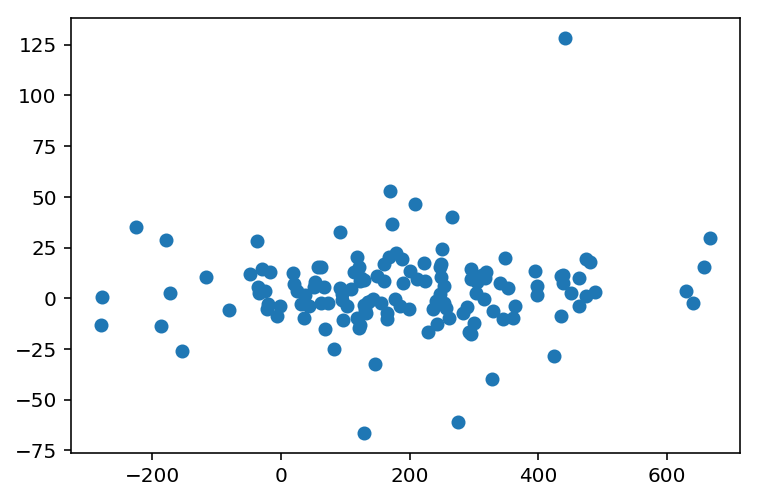

In [93]:
# we can see a little cluster there, which is what we wanted, im not sure
# if it's convincing enough
plt.scatter(dataNeeded[1:]['freqeuency'],dataNeeded[1:]['PriceChange'])
dataNeeded[1:][['freqeuency','PriceChange']].corr()

In [94]:
from scipy.stats import pearsonr

In [96]:
stat, pval = pearsonr(dataNeeded['freqeuency'][1:],dataNeeded['PriceChange'][1:])
print("correlated (same day):", stat)
print('p val', pval)

correlated (same day): 0.09100601547319408
p val 0.2920223168047095


to yesterday's news: correlated: 0.031629861793092136
0.715723961526632


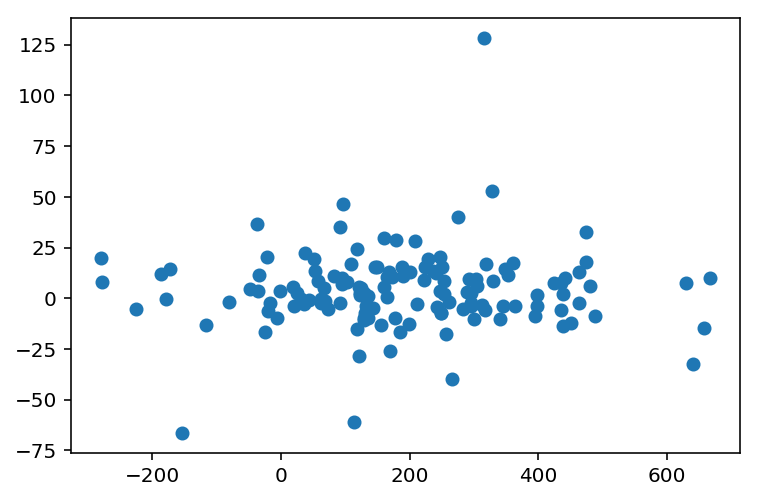

In [97]:
stat, pval = pearsonr(dataNeeded['freqeuency'][1:-1],dataNeeded['PriceChange'][2:])
plt.scatter(dataNeeded['freqeuency'][1:-1],dataNeeded['PriceChange'][2:])
print("to yesterday's news: correlated:", stat) # positively correlated
print(pval) 

# 90% confident that they are negatively slightly correlated.

In [98]:
dataNeeded['FreqChange'] = dataNeeded['freqeuency'].diff()
stat, pval = pearsonr(dataNeeded['FreqChange'][1:],dataNeeded['PriceChange'].loc[1:])
print("frequency change and price change: correlated:", stat) # positively correlated
print(pval) # not significant

frequency change and price change: correlated: 0.03983228059476533
0.645218103803061


In [99]:
stat, pval = pearsonr(dataNeeded['FreqChange'][1:-1],dataNeeded['PriceChange'].loc[2:])
print("to yesterday's frequency change and today's price change: correlated:", stat) # positively correlated
print(pval) # not significant

to yesterday's frequency change and today's price change: correlated: 0.13370938401040577
0.12208837709063848


In [108]:
stat, pval = pearsonr(dataNeeded['freqeuency'][4:],dataNeeded['PriceChange'][1:-3])
print("correlated (Frequency vs. PriceChange):", stat)
print('p val', pval)

correlated (Frequency vs. PriceChange): -0.02960951888965713
p val 0.7351186414525772


In [100]:
stat, pval = pearsonr(dataNeeded['FreqChange'][2:],dataNeeded['PriceChange'][1:-1])
print("to today frequency change and yesterday's price change: correlated:", stat) # positively correlated
print(pval) 

to today frequency change and yesterday's price change: correlated: -0.1516570344008173
0.07910873108307905


In [103]:
stat, pval = pearsonr(dataNeeded['FreqChange'][4:],dataNeeded['PriceChange'][2:-2])
print("to today frequency change and yesterday's price change: correlated:", stat) # positively correlated
print(pval) 

to today frequency change and yesterday's price change: correlated: -0.004534366989363187
0.958688436609907
